In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape


(60000, 28, 28)

In [6]:
X_train[25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83,
         91, 143, 255, 190,  91,  50,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  49, 180, 246,
        253, 253, 253, 253, 253, 220, 154,  17,   3,   0,   0,   0,   0,
          0,   0],
       [  

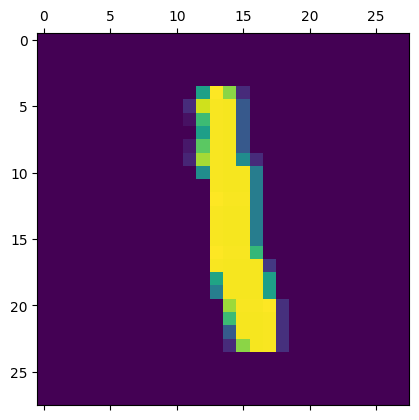

In [7]:
plt.matshow(X_train[6])

In [8]:
Y_train[199]

2

In [9]:
Y_train[:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flatten=X_train.reshape(len(X_train),28*28)

In [12]:
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
model=keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid'),
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                           )#optimizers are mean that optimize the model parameters

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4761 - accuracy: 0.8745
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3052 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2841 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9248


in the training data loss=5.2728 and accuracy=0.9262

In [16]:
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [17]:
X_test_flatten.shape

(10000, 784)

In [18]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.9245


[0.26953279972076416, 0.9244999885559082]

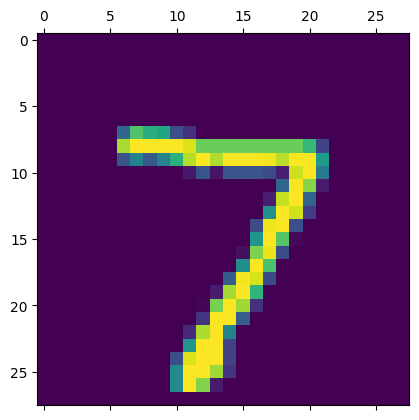

In [19]:
plt.matshow(X_test[0])

In [20]:
y_pred=model.predict(X_test_flatten)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.9913493e-02, 2.7906398e-07, 6.0556553e-02, 9.5103556e-01,
       2.4760894e-03, 8.4407680e-02, 1.5753847e-06, 9.9975675e-01,
       8.9669578e-02, 6.4698148e-01], dtype=float32)

maxscore

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1107,    3,    2,    1,    1,    4,    2,   15,    0],
       [  11,    9,  916,   14,   11,    2,   12,   11,   43,    3],
       [   5,    0,   19,  911,    0,   30,    2,   13,   23,    7],
       [   2,    1,    3,    1,  917,    0,    9,    4,    9,   36],
       [  13,    3,    2,   27,    9,  778,   16,    7,   30,    7],
       [  17,    3,    5,    1,    8,   11,  909,    2,    2,    0],
       [   2,    5,   21,    5,    5,    0,    0,  958,    3,   29],
       [  11,    6,    6,   19,    9,   23,   11,   12,  871,    6],
       [  11,    7,    1,    9,   28,    7,    0,   28,    7,  911]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

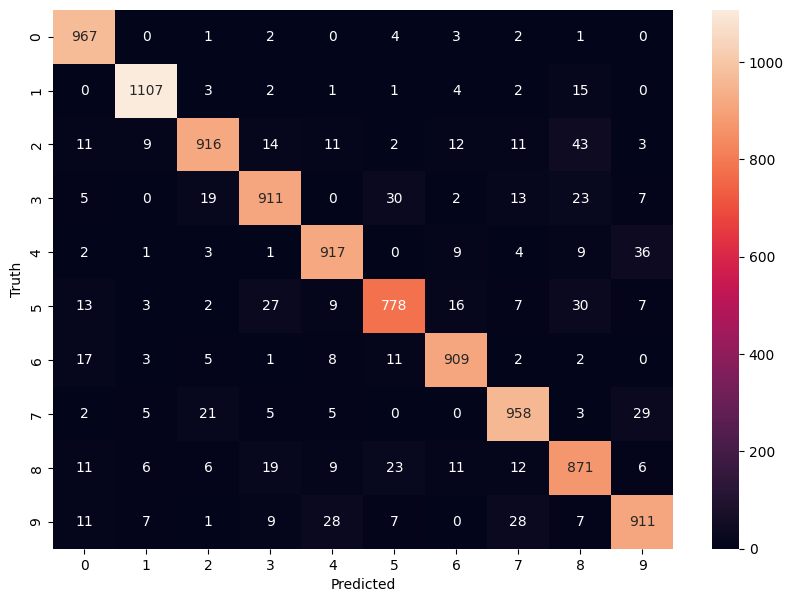

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1251 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0881 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0665 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0527 - accuracy: 0.9843


In [29]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9750


[0.08361651003360748, 0.9750000238418579]

Text(95.72222222222221, 0.5, 'Truth')

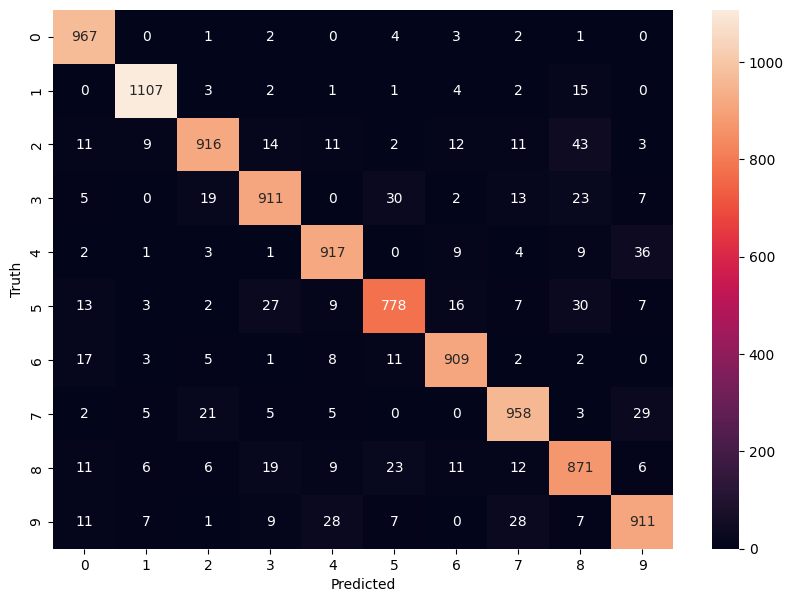

In [30]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='Adagrad',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1880 - accuracy: 0.7312
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6341 - accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5166 - accuracy: 0.8739
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4614 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4279 - accuracy: 0.8898
